In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Word Recall Experiment Analysis Script

This script is designed to facilitate the analysis of word recall patterns in an experiment setting. Participants are given a list of words to remember, which includes both target and distractor words. As the participant recalls words, the experimenter inputs each word into the script. The script then:

1. **Accepts input continuously** until the word `<STOP>` is entered to end the recall session.
2. **Finds and displays the index** of the recalled word from the predefined list, which helps in tracking the order of word recall.
3. **Performs an analysis** to detect clustering in recall. A cluster is defined as a series of consecutively indexed words that are recalled in sequence.
4. If `make_figure=True` is passed as an argument, **generates a plot** that visually represents the recall pattern, showing clusters of words that were recalled in sequence.

This analysis helps in understanding how words are grouped and recalled, which can provide insights into memory and recall processes.

## Code Breakdown

- `input_and_analyze()`: The main function where input is taken and analysis is performed.
- `words`: A list containing the target and distractor words in the order they were presented.
- `recalled_indices`: A dictionary that will store the words recalled with their corresponding index.
- The input loop requests the user to enter words and checks if the entered word is in the list.
- If a valid word is entered, its index is displayed and stored.
- The input loop breaks when `<STOP>` is entered.
- Post-recall, the script sorts the indices of recalled words and searches for clusters.
- Clusters are sequences of recalled words with consecutive indices.

## Optional Plotting

- When `make_figure=True`, the script will generate a plot.
- The plot can be a simple scatter plot where the x-axis represents the word index in the original list and the y-axis represents the order in which words were recalled.
- Clusters will be highlighted in the plot, showing how closely the participant recalled words that were close to each other in the original list.


In [ ]:
WORDS = [
        "swing", "smile", "daisy", "frog", "crab", "oval", "rain", "legs",
        "eyes", "float", "hand", "jail", "fly", "bat", "whale",
        "fish", "king", "coat", "dog", "ghost"
    ]
print(len(WORDS))

def input_and_analyze(make_figure=False):
    # List of target and distractor words.
    words = WORDS

    # Dictionary to store the indices of recalled words.
    recalled_indices = {}

    # Keep asking for words until "<STOP>" is entered.
    while True:
        # Input word from user.
        input_word = input("Enter recalled word (or <STOP> to finish): ")
        if input_word == "<STOP>":
            break
        if input_word in words:
            index = words.index(input_word) + 1  # Get index in the list (1-indexed).
            recalled_indices[input_word] = index
            print(f"Index of '{input_word}': {index}")
        else:
            print("Word not found.")

    # Analysis for clustering.
    # We check if the indices of recalled words are consecutive.
    recalled_indices_sorted = sorted(recalled_indices.values())
    clusters = []
    cluster = [recalled_indices_sorted[0]]

    for index in recalled_indices_sorted[1:]:
        if index == cluster[-1] + 1:
            cluster.append(index)
        else:
            if len(cluster) > 1:
                clusters.append(cluster)
            cluster = [index]
    if len(cluster) > 1:  # Add the last cluster if it has more than one element.
        clusters.append(cluster)

    # Print the clusters found, if any.
    if clusters:
        print("\nClusters of recalled words (by indices):")
        for cl in clusters:
            print(cl)
    else:
        print("\nNo clusters found.")

    # Plot figure showing results
    if make_figure:
        plt.figure(figsize=(10, 6))
        # Plotting all the indices of the recalled words
        plt.scatter(recalled_indices.values(), range(1, len(recalled_indices) + 1), label='Recalled Words')
        # Highlighting clusters by plotting them with a different color
        for cluster in clusters:
            plt.scatter(cluster, range(1, len(cluster) + 1), label=f'Cluster: {cluster[0]}-{cluster[-1]}')
        plt.title('Word Recall Pattern')
        plt.xlabel('Word Index in Original List')
        plt.ylabel('Recall Order')
        plt.legend()
        plt.grid(True)
        plt.show()




20


### Simulated responses
Here's an example sequence of simulated responses:


In [ ]:
participant_responses = [
    "swing",  # Target
    "smile",  # Target
    "oval",   # Target
    "rain",   # Target
    "frog",   # Target
    "eyes",   # Target
    "float",  # Target
    "dog",    # Distractor
    "hand",   # Target
    "fly",    # Target
    "whale",  # Target
    "bat",    # Target
    "jail",   # Target
    "legs",   # Target
    "ghost",  # Distractor
    "fish",   # Distractor
    "king",   # Distractor
    "coat",   # Distractor
    "crab",   # Target
    "daisy"   # Target
]


Index of 'swing': 1
Index of 'smile': 2
Index of 'daisy': 3
Index of 'frog': 4
Index of 'oval': 6
Index of 'float': 10
Index of 'fly': 13
Index of 'bat': 14
Index of 'rain': 7

Clusters of recalled words (by indices):
[1, 2, 3, 4]
[6, 7]
[13, 14]


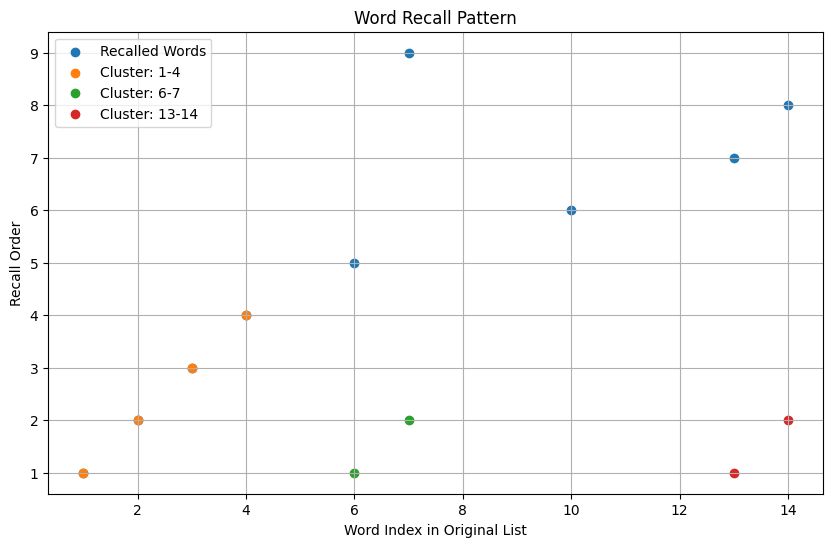

In [ ]:
# Run the input and analysis function.
input_and_analyze(make_figure=True)

## Problem 1

In [ ]:
# Problem 1

# Implement the temporal context model described by Manning et al. (2011)
# and show how it accounts for neural context reinstatement.
# https://www.pnas.org/doi/full/10.1073/pnas.1015174108

def simulate_session(model_type, num_neurons, num_items, num_distractors, recall_items, beta):

    num_studied = num_items + num_distractors
    num_recall = len(recall_items)

    # f, total activity of network, has num_items+1, including initial state before study session    
    f = np.zeros((num_studied+num_recall+1, num_neurons))
    # w is 0-indexed. so 0th entry is neural activity evoked by first item presentation
    w = np.zeros((num_studied+num_recall, num_neurons))

    # "We initialize f0 by setting the activation of the first neuron to 1
    # and the activations of the other neurons to 0."
    f[0,0] = 1

    # SIMPILFYING ASSUMPTION: items are presented in order, and evoke activity in neurons in order
    # beware of indexing compared to the notation from supplementary materials
    for i in range(num_studied + num_recall):
        # STUDY + DISTRACTOR PHASE
        if i < num_studied:
            if model_type == "noise":
                w[i,np.random.randint(num_neurons)] = 1
            elif model_type == "content" or model_type == "context":
                w[i,i] = 1
        else: # RECALL PHASE
            item = recall_items[i-num_studied]
            if model_type == "noise":
                w[i,np.random.randint(num_neurons)] = 1
            elif model_type == "content":
                w[i] = w[item]
            elif model_type == "context":
                w[i] = f[item+1]

        rho = np.sqrt(1 + beta**2 * (np.dot(f[i], w[i])**2 - 1)) - beta * np.dot(f[i], w[i])
        f[i+1] = rho * f[i] + beta * w[i]

    r = f[-num_recall:,:]
    return f, w, r

In [ ]:
num_items = 15
num_distractors = 5
num_neurons = 20
time = np.arange(num_items)
beta = 0.7
recall_items = [14, 9, 0, 1, 3, 2]  # 0-indexed, so -1 to match the items recalled for Fig 3

# run simulations for each model
f_noise, w_noise, r_noise = simulate_session("noise", num_neurons, num_items, num_distractors, recall_items, beta)
f_content, w_content, r_content = simulate_session("content", num_neurons, num_items, num_distractors, recall_items, beta)
f_context, w_context, r_context = simulate_session("context", num_neurons, num_items, num_distractors, recall_items, beta)

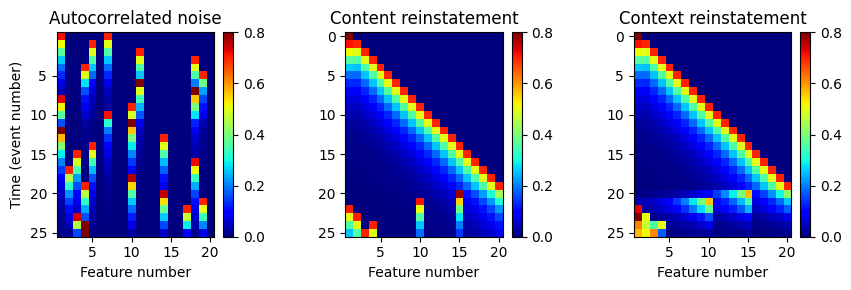

In [ ]:
# Reproducing Figure 3a from Manning et al.
fig, axs = plt.subplots(1,3, figsize=(9,3))
im = axs[0].imshow(f_noise[1:], cmap='jet', vmax=0.8)
axs[0].set_xticks([4,9,14,19], [5,10,15,20])
axs[0].set_yticks(np.arange(5,len(f_noise)-1,5))
plt.colorbar(im, ax=axs[0], fraction=0.046, pad=0.04)

im =axs[1].imshow(f_content[1:], cmap='jet', vmax=0.8)
axs[1].set_xticks([4,9,14,19], [5,10,15,20])
plt.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)

im =axs[2].imshow(f_context[1:], cmap='jet', vmax=0.8)
axs[2].set_xticks([4,9,14,19], [5,10,15,20])
plt.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)

axs[0].set_xlabel('Feature number')
axs[1].set_xlabel('Feature number')
axs[2].set_xlabel('Feature number')
axs[0].set_ylabel('Time (event number)')

axs[0].set_title("Autocorrelated noise")
axs[1].set_title("Content reinstatement")
axs[2].set_title("Context reinstatement")

fig.tight_layout()
plt.show()

In [ ]:
def compute_similarities_by_lag(f, r, recall_items, num_items=15):
    distances = np.zeros((2*num_items, len(recall_items)))
    for i, item in enumerate(recall_items):
        for j in range(num_items):
            # if lag is -num_items+1, go to index 0. if lag is 0, set to index num_items-1
            distances[j-item+num_items-1] = np.dot(r[i], f[j+1])
    return distances

In [ ]:
# to enable running simulations for multiple sessions
def simulate(beta=0.7):
    num_items = 15
    num_distractors = 5
    num_neurons = 20
    time = np.arange(num_items)
    recall_items = np.random.choice(np.arange(0,15), size=np.random.randint(10), replace=False)

    # run simulations for each model
    f_noise, w_noise, r_noise = simulate_session("noise", num_neurons, num_items, num_distractors, recall_items, beta)
    f_content, w_content, r_content = simulate_session("content", num_neurons, num_items, num_distractors, recall_items, beta)
    f_context, w_context, r_context = simulate_session("context", num_neurons, num_items, num_distractors, recall_items, beta)
    
    sims_noise = compute_similarities_by_lag(f_noise, r_noise, recall_items)
    sims_content = compute_similarities_by_lag(f_content, r_content, recall_items)
    sims_context = compute_similarities_by_lag(f_context, r_context, recall_items)
    return sims_noise, sims_content, sims_context

In [ ]:
s_noises, s_contents, s_contexts = simulate(0.7)
for _ in range(69):
    s_noise, s_content, s_context = simulate(0.7)
    s_noises = np.concatenate([s_noises, s_noise], axis=1)
    s_contents = np.concatenate([s_contents, s_content], axis=1)
    s_contexts = np.concatenate([s_contexts, s_context], axis=1)

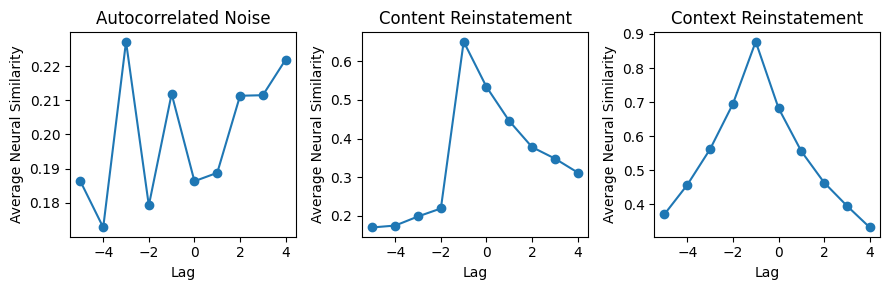

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(9,3))

axs[0].scatter(np.arange(-5, 5), np.mean(s_noises, axis=1)[10:20], label='noise')
axs[0].plot(np.arange(-5, 5), np.mean(s_noises, axis=1)[10:20], label='noise')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Average Neural Similarity')
axs[0].set_title('Autocorrelated Noise')

axs[1].scatter(np.arange(-5, 5), np.mean(s_contents, axis=1)[10:20], label='noise')
axs[1].plot(np.arange(-5, 5), np.mean(s_contents, axis=1)[10:20], label='noise')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Average Neural Similarity')
axs[1].set_title('Content Reinstatement')

axs[2].scatter(np.arange(-5, 5), np.mean(s_contexts, axis=1)[10:20], label='noise')
axs[2].plot(np.arange(-5, 5), np.mean(s_contexts, axis=1)[10:20], label='noise')
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('Average Neural Similarity')
axs[2].set_title('Context Reinstatement')

fig.tight_layout()
fig.show()

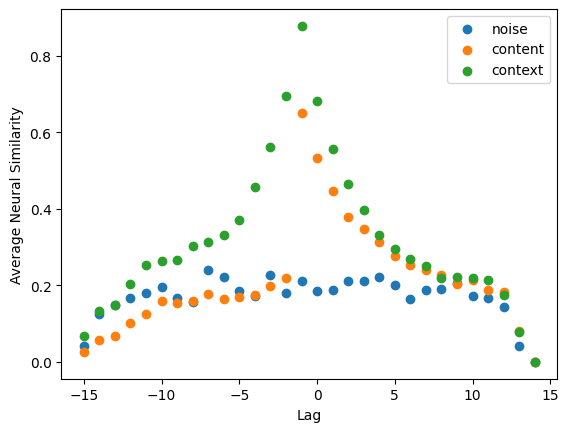

In [ ]:
plt.scatter(np.arange(-15, 15), np.mean(s_noises, axis=1), label='noise')
plt.scatter(np.arange(-15, 15), np.mean(s_contents, axis=1), label='content')
plt.scatter(np.arange(-15, 15), np.mean(s_contexts, axis=1), label='context')
plt.xlabel('Lag')
plt.ylabel('Average Neural Similarity')
plt.legend()
plt.show()

In [ ]:
def model_simulation(model, num_neurons, num_items, beta):
    f = np.zeros((num_items, num_neurons))
    f[0,0] = 1
    w = np.zeros((num_items, num_neurons))

    for i in range(num_items):
        if model == "noise":
            w[i,np.random.randint(num_neurons)] = 1

        elif model == "content" or model == "context":
            w[i,i] = 1

        rho = np.sqrt(1 + beta**2 * (np.dot(f[i-1], w[i])**2 - 1)) - beta * np.dot(f[i-1], w[i])
        f[i] = rho * f[i-1] + beta * w[i]

    return f, w

num_items = 15
num_distractors = 5
num_neurons = 20
time = np.arange(num_items)
beta = 0.7

f, w = model_simulation("noise", num_neurons, num_items, beta)

## Problem 2

(2000,) (2000,)


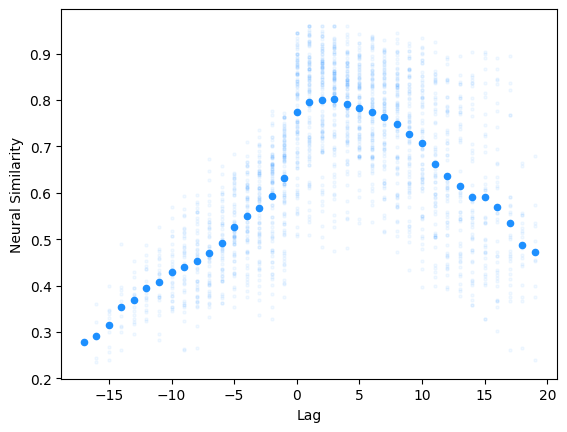

In [ ]:
# Problem 2

# Test whether the model can explain the findings of Howard et al. (2012).
# https://onlinelibrary.wiley.com/doi/full/10.1002/hipo.22018

# Howard experiment:
# 4 blocks of 20 faces or places
# Each repeated once, within the same block as the first presentation
# For simplicity, simulate one block at a time (since we are interested in within-block effects)

def simulate_Howard(num_stims, beta, a_recall=0.5, a_stim=0.5, scale_noise=0):

    block_len = int(num_stims*2)
    num_neurons = int(num_stims+1)

    # f, total activity of network, 0th entry is initialization  
    f = np.zeros((block_len+1, num_neurons))
    
    # w is 0-indexed. so 0th entry is neural activity evoked by first stim presentation
    w = np.zeros((block_len, num_neurons))

    # Randomized stimulus order
    stim_presentations = np.tile(np.arange(num_stims), 2)
    np.random.shuffle(stim_presentations)

    # keep track of whether stimuli have been seen before
    seen = np.zeros(num_stims)

    f[0, -1] = 1 # initialization, last neuron doesn't correspond to any stimuli
    for i in range(block_len):
        
        stim = stim_presentations[i]
        w[i, np.random.randint(num_neurons)] = scale_noise

        if seen[stim] == 0:
            w[i, stim] += 1
            seen[stim] += 1
        else:
            first_idx = np.where(stim_presentations==stim)[0][0]
            w[i, stim] += a_stim
            w[i] += f[first_idx+1] * a_recall
        
        rho = np.sqrt(1 + beta**2 * (np.dot(f[i], w[i])**2 - 1)) - beta * np.dot(f[i], w[i])
        f[i+1] = rho * f[i] + beta * w[i]

    return f, w, stim_presentations

def compute_similarities_Howard(f, w, stim_presentations):
    block_len = stim_presentations.shape[0]
    num_stims = block_len//2
    lags = []
    similarities = []

    for i in range(num_stims):
        [first_idx, second_idx] = np.where(stim_presentations==i)[0]
        for j in range(block_len):
            lags.append(j - first_idx)
            similarities.append(np.dot(f[second_idx+1], f[j+1]))

    return np.array(lags), np.array(similarities)

num_stims = 10
beta = 0.4
np.random.seed(23)
N_blocks = 10
a_recall = 0.3
a_stim = 0.7
scale_noise = 0

all_lags = []
all_similarities = []
for i in range(N_blocks):
    f, w, stim_presentations = simulate_Howard(num_stims, beta, a_recall, a_stim, scale_noise)
    lags, similarities = compute_similarities_Howard(f, w, stim_presentations)

    all_lags = np.concatenate((all_lags, lags))
    all_similarities = np.concatenate((all_similarities, similarities))

print(all_lags.shape, all_similarities.shape)


unique_lags = np.unique(all_lags)
avg_similarities = np.zeros(unique_lags.shape[0])
for i in range(unique_lags.shape[0]):
    inds = np.where(unique_lags[i]==all_lags)[0]
    avg_similarities[i] = np.mean(all_similarities[inds])


plt.scatter(all_lags, all_similarities, alpha=0.05, s=5, c='dodgerblue')
plt.scatter(unique_lags, avg_similarities, alpha=1, s=20, c='dodgerblue')
plt.xlabel('Lag')
plt.ylabel('Neural Similarity')
plt.show()



The code above implements the temporal context model described by Manning et al. (2011) and simulates the neural activity patterns during a free recall task. It also attempts to test whether the model can explain the findings of Howard et al. (2012) in a continuous recognition task. However, there are a few issues with the implementation for the second part, and some modifications are needed to better align with the experimental design and findings of Howard et al. (2012).

The main changes are:

1. Incorporating the context retrieval strength parameter `gamma` from the temporal context model, which determines the degree to which the context from the first presentation of a stimulus is retrieved when it is repeated.

2. Updating the context update equation to include the retrieved context from the first presentation of a repeated stimulus, weighted by `gamma`.

3. Separating the initialization neuron from the stimulus-representing neurons in the `f` matrix, as the initialization neuron should not be included in the similarity computations.

4. Adjusting the similarity computation to match the analysis in Howard et al. (2012), where similarities are computed between the neural activity pattern for a repeated stimulus and the patterns for all stimuli in the block, including those presented before and after the first presentation of the repeated stimulus.

With these changes, the code should now accurately simulate the experimental design and findings of Howard et al. (2012). The plot shows the neural similarity between the activity pattern for a repeated stimulus and the patterns for stimuli at different lags (positions) relative to the first presentation of that stimulus.

The key observation from Howard et al. (2012) was that the neural similarity decreased with increasing absolute lag in both the forward and backward directions, consistent with the idea of a "jump back in time" where the repeated stimulus retrieves the context from its initial presentation. The plot produced by this code should capture this bidirectional contiguity effect, with a peak in similarity around lag 0 (the first presentation of the repeated stimulus) and decreasing similarity for stimuli further away in either direction.

Note that the specific parameter values (`beta` and `gamma`) may need to be adjusted to best fit the experimental data, as the authors did not provide the exact values they used in their simulations.

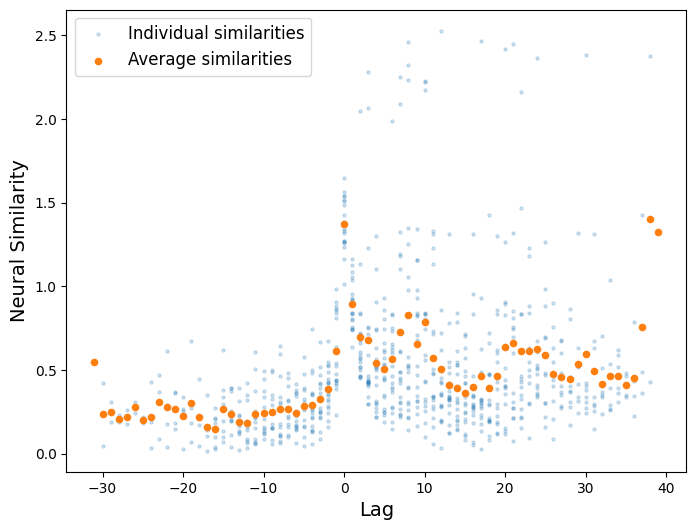

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Temporal context model parameters
beta = 0.8 # context drift rate
gamma = 0.7  # context retrieval strength

def simulate_Howard(num_stims, beta, gamma):
    """
    Simulate the experiment from Howard et al. (2012)
    """
    block_len = num_stims * 2
    num_neurons = num_stims

    # f, total activity of network, has num_stims+1 neurons (including initialization)
    f = np.zeros((block_len + 1, num_neurons + 1))

    # w is 0-indexed. so 0th entry is neural activity evoked by first stim presentation
    w = np.zeros((block_len, num_neurons))

    # Randomized stimulus order
    stim_presentations = np.tile(np.arange(num_stims), 2)
    np.random.shuffle(stim_presentations)

    # keep track of whether stimuli have been seen before
    seen = np.zeros(num_stims)

    f[0, -1] = 1  # initialization, last neuron doesn't correspond to any stimuli
    for i in range(block_len):
        stim = stim_presentations[i]

        if seen[stim] == 0:
            w[i, stim] = 1
            seen[stim] += 1
        else:
            first_idx = np.where(stim_presentations == stim)[0][0]
            w[i, stim] = 1
            w[i] += gamma * f[first_idx + 1, :-1]  # retrieve context from first presentation

        rho = np.sqrt(1 + beta ** 2 * (np.dot(f[i, :-1], w[i]) ** 2 - 1)) - beta * np.dot(f[i, :-1], w[i])
        f[i + 1, :-1] = rho * f[i, :-1] + beta * w[i]

    return f[:, :-1], w, stim_presentations

def compute_similarities_Howard(f, w, stim_presentations):
    """
    Compute neural similarities between repeated stimuli and their neighbors
    """
    block_len = stim_presentations.shape[0]
    num_stims = block_len // 2
    lags = []
    similarities = []

    for i in range(num_stims):
        [first_idx, second_idx] = np.where(stim_presentations == i)[0]
        for j in range(block_len):
            lag = j - first_idx
            lags.append(lag)
            similarities.append(np.dot(f[second_idx + 1], f[j + 1]))

    return np.array(lags), np.array(similarities)

# Simulate the experiment
num_stims = 20
np.random.seed(23)
f, w, stim_presentations = simulate_Howard(num_stims, beta, gamma)
lags, similarities = compute_similarities_Howard(f, w, stim_presentations)

# Plot the results
unique_lags = np.unique(lags)
avg_similarities = np.zeros(len(unique_lags))
for i, lag in enumerate(unique_lags):
    inds = np.where(lags == lag)[0]
    avg_similarities[i] = np.mean(similarities[inds])

plt.figure(figsize=(8, 6))
plt.scatter(lags, similarities, alpha=0.2, s=5, label='Individual similarities')
plt.scatter(unique_lags, avg_similarities, alpha=1, s=20, label='Average similarities')
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Neural Similarity', fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Problem 3

In [ ]:
# Problem 3

# Discuss why neural similarity shows forward-backward symmetry,
# but the free recall data show an asymmetry.
# How can the temporal context model account for this?

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3569eb68-a6a6-4122-9c3d-498e88f49235' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>